In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Company.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [2]:
X = df.drop(columns='Sales')
y = df['Sales']

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [5]:
y_pred = model.predict(X_test)

In [6]:
## 5 -  Misurare l'errore del mio modello
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2score = r2_score(y_test, y_pred)
ad_r2score = 1-(1-r2score)*(len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)

print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2_score: ', r2score)
print('Adjusted_R2_score: ', ad_r2score)

MAE:  1.0686845290246514
MSE:  2.141222661178714
RMSE:  1.463291721147466
R2_score:  0.9228327284282676
Adjusted_R2_score:  0.9186987674512105


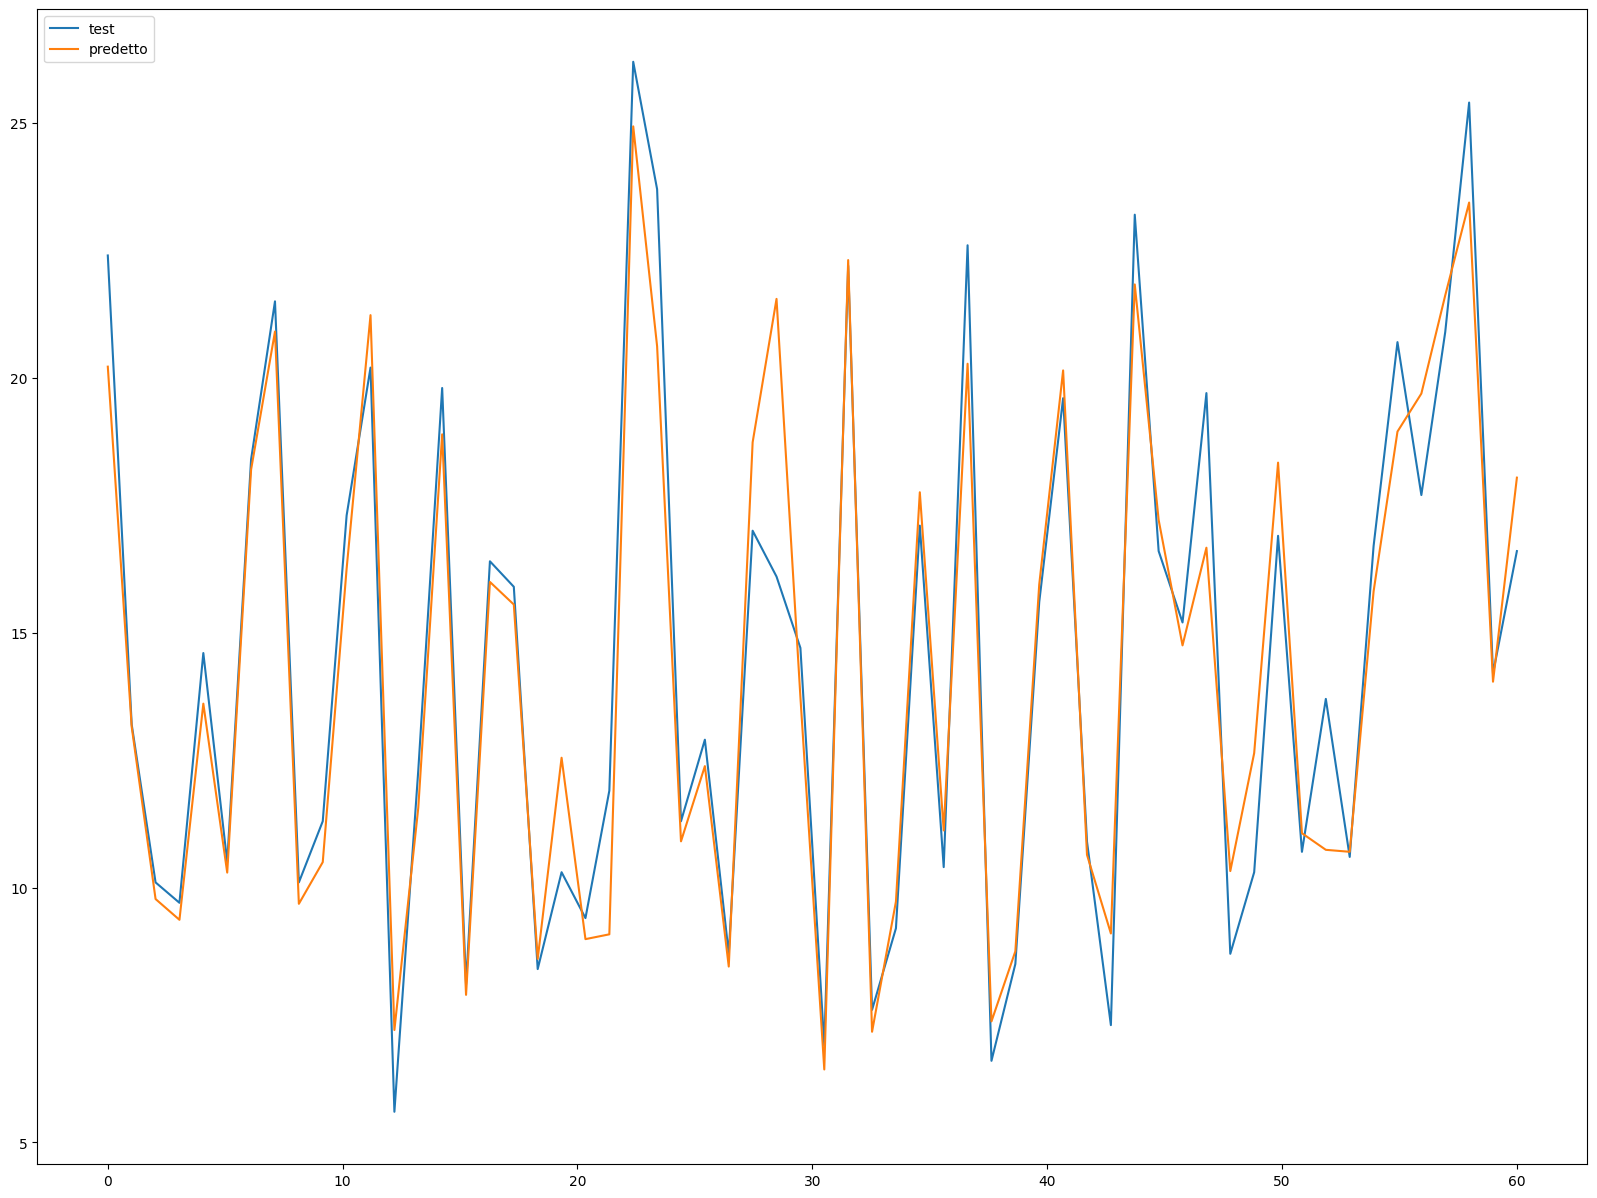

In [7]:
length = y_pred.shape[0] #  
x = np.linspace(0,length,length)


plt.figure(figsize=(20,15))
plt.plot(x, y_test, label='test')
plt.plot(x, y_pred, label='predetto')
plt.legend(loc=2);

In [8]:
import joblib

## to save a model
joblib.dump(model,'company.pkl')

['company.pkl']

In [9]:
## to load model
newmodel = joblib.load('company.pkl')
newmodel

LinearRegression()

In [10]:
newmodel.predict([[324,34,56]])[0]

25.9584112445931